In [8]:
# importing all libraries needed for Q8 and Q9
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing scikit-learn models, metrics and scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# classification related imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, roc_curve, auc, classification_report, confusion_matrix

Loading and Cleaning the Dataset here using the Pandas Library for Q8

In [9]:
# loading csv file
df = pd.read_csv("home_garden_iot_data.csv")

# Data Cleaning
# dropping unnamed columns and needs_watering column
columns_to_drop = [col for col in df.columns if 'Unnamed' in col or col == 'needs_watering']
df.drop(columns=columns_to_drop, inplace=True)

# drops empty columns
df.dropna(inplace=True)

# target and feature columns
target_column = 'soil_moisture'
feature_columns = df.columns.drop(target_column)


8. You are given the Home Garden IoT Dataset which is obtained using a set of sensors placed in a home garden. The dataset has been annotated manually to indicate if the plant needs watering. Using the above dataset.

    a) Normalize the data using the scikit learn StandardScaler.

Printing Dataset Shape, Splitting Data and Normalizing Data for Linear Regression Model

In [10]:
# print dataset shape and target column name
print(f"\nDataset shape: {df.shape}")
print(f"Target variable for prediction: '{target_column}'")

# identifying x and y variables (x = features y = target)
x = df[feature_columns]
y = df[target_column]

# setting train / test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print("-" * 50)

# normalizing data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"X_train_scaled now has shape: {x_train_scaled.shape}")
print("-" * 50)


Dataset shape: (1000, 9)
Target variable for prediction: 'soil_moisture'
x_train shape: (800, 8)
x_test shape: (200, 8)
--------------------------------------------------
X_train_scaled now has shape: (800, 8)
--------------------------------------------------


Creating Linear Regression Model, Printing Predictions and Evaluation of Model (MSE and RMSE)

In [11]:
# creating linear regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# predictions
y_pred = model.predict(x_test_scaled)

# evaluation of model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# display evaluation and interpretation
print("Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("-" * 50)

# Interpretation: A lower RMSE is better.
print(f"The RMSE of {rmse:.2f} means that, on average, the model's prediction for")
print(f"soil moisture is off by approximately {rmse:.2f} units from the actual value.")

Model Evaluation:
Mean Squared Error: 13.736496555030062
Root Mean Squared Error: 3.706277992141181
--------------------------------------------------
The RMSE of 3.71 means that, on average, the model's prediction for
soil moisture is off by approximately 3.71 units from the actual value.


Cleaning Dataset for Q9

In [12]:
# Data Loading
df = pd.read_csv("home_garden_iot_data.csv")

# Data Cleaning
columns_to_drop = [col for col in df.columns if 'Unnamed' in col or col == 'soil_moisture']
df.drop(columns=columns_to_drop, inplace=True)

# drops empty columns
df.dropna(inplace=True)

Identifying Variables, Printing Dataset Shape and Normalizing the Dataset

In [13]:
# target and feature columns
target_column = 'needs_watering'
feature_columns = df.columns.drop(target_column)

# print dataset shape and target column name
print(f"\nDataset shape: {df.shape}")
print(f"Target variable for prediction: '{target_column}'")

# identifying x and y variables (x = features y = target)
x = df[feature_columns]
y = df[target_column]

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,  stratify=y)

# normalizing data using standard scaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"\nClassification X_train shape: {x_train_scaled.shape}")
print(f"Classification X_test shape: {x_test_scaled.shape}")


Dataset shape: (1000, 9)
Target variable for prediction: 'needs_watering'

Classification X_train shape: (800, 8)
Classification X_test shape: (200, 8)


Initialzing Models and Printing Evaluations (ROC Curve Included Here Along w/ Specificity and Sensitivity)


--- Classification Model Training and Evaluation ---

Model: kNN (k=5)
Sensitivity (Recall): 0.9677
Specificity (TNR): 0.9638

Model: Decision Tree
Sensitivity (Recall): 0.9355
Specificity (TNR): 0.9710

Model: SVM
Sensitivity (Recall): 0.9516
Specificity (TNR): 0.9710

Summary of Sensitivity and Specificity:
| Model         |   Sensitivity |   Specificity |
|:--------------|--------------:|--------------:|
| kNN (k=5)     |        0.9677 |        0.9638 |
| Decision Tree |        0.9355 |        0.971  |
| SVM           |        0.9516 |        0.971  |


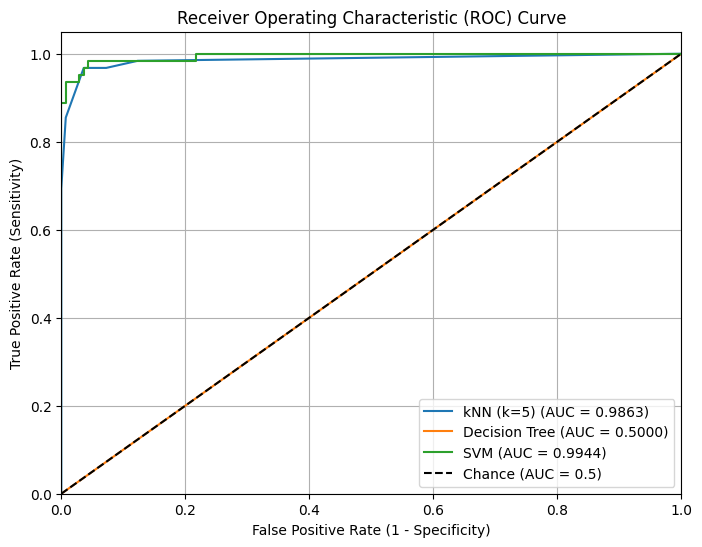


--- Area Under the Curve (AUC) Report ---
| Model         |      AUC |
|:--------------|---------:|
| kNN (k=5)     | 0.986325 |
| Decision Tree | 0.5      |
| SVM           | 0.99439  |


In [14]:
# initializing models with parameters 
models = {
    "kNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM": SVC(probability=True, kernel='rbf', C=1.0, random_state=42)
}

results = {}

print("\n--- Classification Model Training and Evaluation ---")

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    
    # Predict on Test Set
    y_pred = model.predict(x_test_scaled)
     
    # pos_label=1 means 'needs watering' (the positive case)
    sensitivity = recall_score(y_test, y_pred, pos_label=1)
    # pos_label=0 means 'does not need watering' (the negative case)
    specificity = recall_score(y_test, y_pred, pos_label=0)

    results[name] = {
        "Sensitivity (Recall)": f"{sensitivity:.4f}",
        "Specificity (TNR)": f"{specificity:.4f}",
        "Model": model
    }
    
    print(f"\nModel: {name}")
    print(f"Sensitivity (Recall): {results[name]['Sensitivity (Recall)']}")
    print(f"Specificity (TNR): {results[name]['Specificity (TNR)']}")
    
# Display summary table
results_df = pd.DataFrame({
    'Model': [name for name in results.keys()],
    'Sensitivity': [res['Sensitivity (Recall)'] for res in results.values()],
    'Specificity': [res['Specificity (TNR)'] for res in results.values()]
})

print("\nSummary of Sensitivity and Specificity:")
print(results_df.to_markdown(index=False))

# Create a figure for the ROC curves
plt.figure(figsize=(8, 6))

# determines which model to use then creates plot
for name, res in results.items():
    model = res['Model']
    
    if name == "Decision Tree":
        x_test_data = x_test.values
    else:
        x_test_data = x_test_scaled

    y_proba = model.predict_proba(x_test_data)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot the curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    
    # Store AUC for reporting
    results[name]['AUC'] = roc_auc

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Report AUC values
auc_report = pd.DataFrame({
    'Model': [name for name in results.keys()],
    'AUC': [res.get('AUC', 'N/A') for res in results.values()]
})
print("\n--- Area Under the Curve (AUC) Report ---")
print(auc_report.to_markdown(index=False))

Q9 Adidditional Answers

9B) I would prioritize keeping the sensitivity as high as possible as not watering a plant which actually needs water can lead to the plant dying. So I would prefer to have a higher detection rate of when a plant needs watering over finding when there is a false negative at a lower rate. In this specific example it makes more sense to find the higher rate of when a plant needs watering as there is less of a fatal cost for a false negative. Worst case scenario you water an already watered plant.



9C) I would recommend using the Decision Tree Model as it is very efficient memory wise compared to KNN and is very fast in terms of computation.



9D) The current approach uses a single 80 / 20 split, meaning the results are highly dependent on that single random split. Cross-validation would be very helpful here as it would prove the model's reliability as this current split has the chance to make the training data harder or easier depending on how the data is split. By doing cross-validation here it would depict the model's capability more accurately.